# Cluster Analysis

In [1]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from matplotlib import rcParams
import numpy as np

In [2]:
#reading the dataset
df = pd.read_csv('data\dataset.csv')
df.head(3)

Unnamed: 0    artistName                        trackName  msPlayed  \
0           2      Dua Lipa                            IDGAF    213981   
1          23  Selena Gomez                      Back To You    189227   
2          29    Ed Sheeran  Beautiful People (feat. Khalid)    176352   

              datetime  danceability  energy  key  loudness  mode  \
0  2020-05-28 09:21:00         0.836   0.544  7.0    -5.975   1.0   
1  2020-05-29 13:23:00         0.601   0.724  6.0    -4.856   1.0   
2  2020-05-29 13:42:00         0.640   0.648  5.0    -8.113   0.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0943        0.0403          0.000000    0.0824    0.510   97.028   
1       0.0486        0.0945          0.000002    0.1200    0.508  102.061   
2       0.1870        0.1240          0.000000    0.0802    0.548   92.977   

                       id  time_signature  
0  76cy1WJvNGJTj78UqeA5zr             4.0  
1  4hQ6UGyWQIGJmHSo0J88JW             4.0  
2  4evmHXcjt3bTUHD1cvny97             4.0

In [3]:
#dropping extra columns
df = df.drop(columns=['Unnamed: 0', 'datetime', 'id'])
df.head(3) 

artistName                        trackName  msPlayed  danceability  \
0      Dua Lipa                            IDGAF    213981         0.836   
1  Selena Gomez                      Back To You    189227         0.601   
2    Ed Sheeran  Beautiful People (feat. Khalid)    176352         0.640   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.544  7.0    -5.975   1.0       0.0943        0.0403          0.000000   
1   0.724  6.0    -4.856   1.0       0.0486        0.0945          0.000002   
2   0.648  5.0    -8.113   0.0       0.1870        0.1240          0.000000   

   liveness  valence    tempo  time_signature  
0    0.0824    0.510   97.028             4.0  
1    0.1200    0.508  102.061             4.0  
2    0.0802    0.548   92.977             4.0

In [4]:
# taking required columns
x = df[['danceability', 'energy', 'loudness',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo'	]]

## Standardizing the variables

In [5]:
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(x)

## Dimensionality Reduction

In [6]:
from sklearn.manifold import TSNE

In [7]:
X_tsne = TSNE(learning_rate=100).fit_transform(x_scaled)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

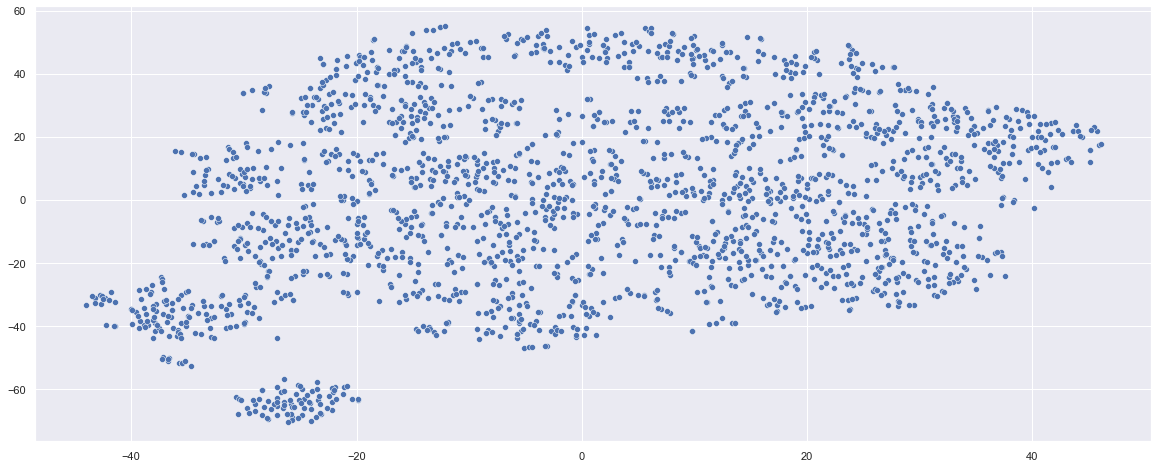

In [8]:
rcParams['figure.figsize'] = 20,8
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1])

In [9]:
data = pd.DataFrame({'d1': X_tsne[:, 0], 'd2': X_tsne[:, 1]})

## K-Means

In [10]:
from sklearn.cluster import KMeans

### Elbow Method

In [11]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[19214.99999999997,
 16048.006906804203,
 14370.653528170358,
 12869.54385035166,
 11855.903996136438,
 10701.164264673005,
 9982.076326897784,
 9322.654572411944,
 8799.316929473707,
 8477.035050138866]

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WCSS')

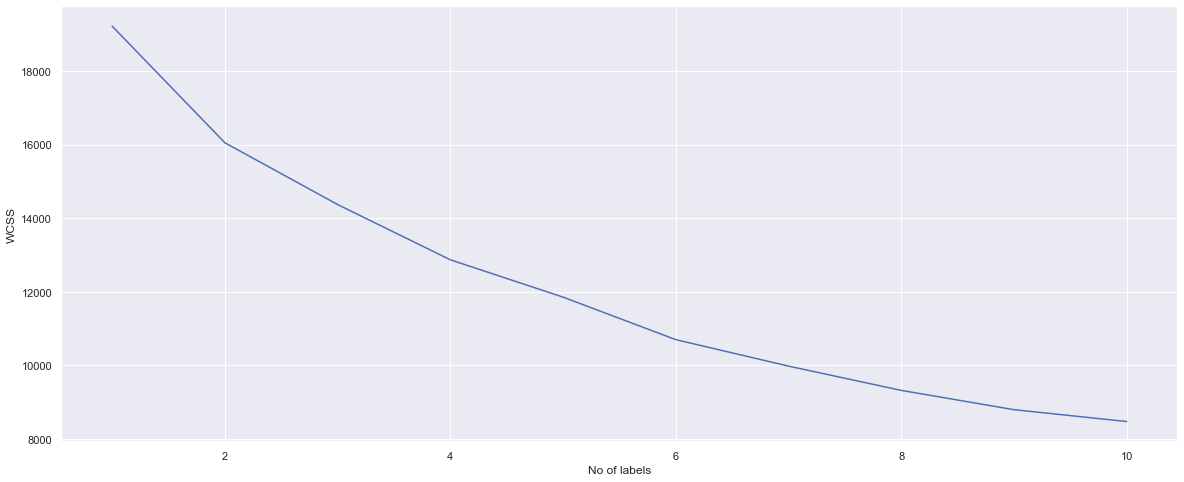

In [12]:
sns.lineplot(range(1,11), wcss)
plt.xlabel('No of labels')
plt.ylabel('WCSS')

### Clusters

In [13]:
kmeans_model = KMeans(6)
kmeans_model.fit(x_scaled)
data['kmeans']=kmeans_model.fit_predict(x_scaled)

<AxesSubplot:xlabel='d1', ylabel='d2'>

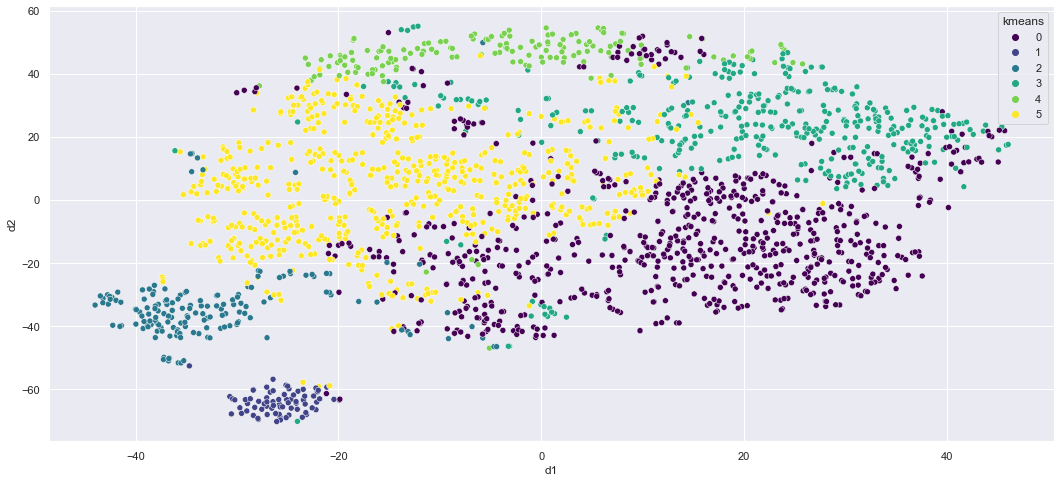

In [14]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='kmeans', palette='viridis')

## Agglomerative Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
model_agg = AgglomerativeClustering(n_clusters=6)
model_agg.fit(x_scaled)
data['agg']=model_agg.fit_predict(x_scaled)

<AxesSubplot:xlabel='d1', ylabel='d2'>

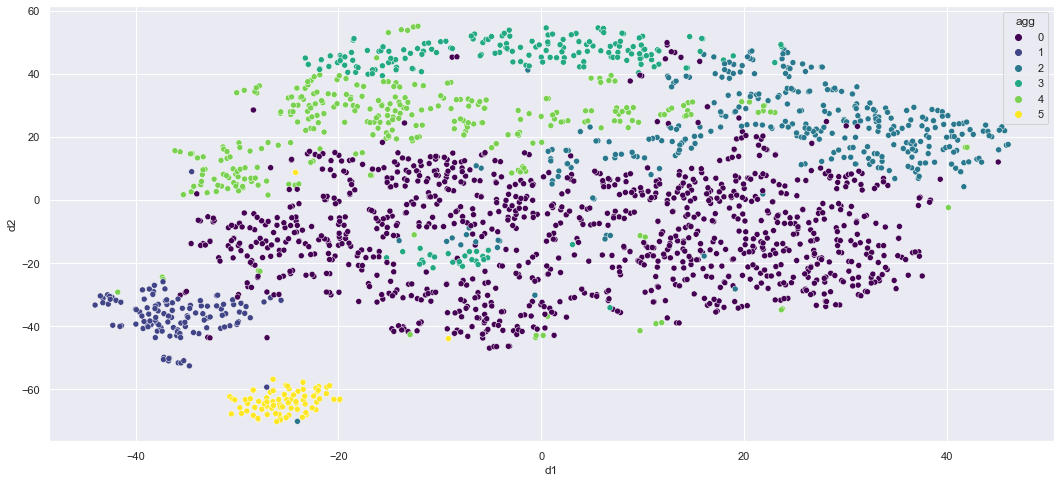

In [17]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='agg', palette='viridis')

## Affinity Propagation Clustering

In [18]:
from sklearn.cluster import AffinityPropagation

In [19]:
model_ap = AffinityPropagation(damping=0.9)
model_ap.fit(x_scaled)
data['ap'] = model_ap.predict(x_scaled)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_affinity_propagation.py:460: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn("This model does

<AxesSubplot:xlabel='d1', ylabel='d2'>

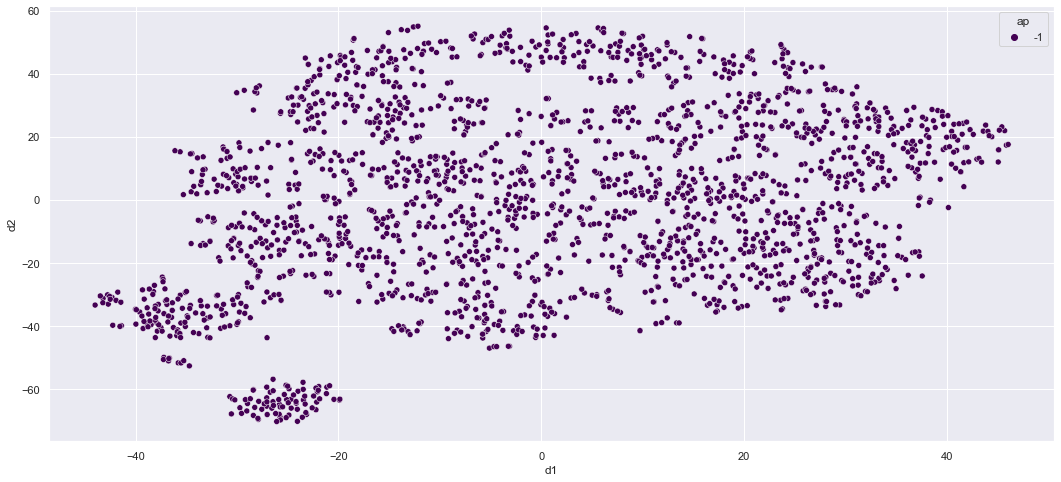

In [20]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='ap', palette='viridis')

## BIRCH

In [21]:
from sklearn.cluster import Birch

In [22]:
model_birch = Birch(threshold=0.01, n_clusters=4)
model_birch.fit(x_scaled)
data['birch'] = model_birch.predict(x)

<AxesSubplot:xlabel='d1', ylabel='d2'>

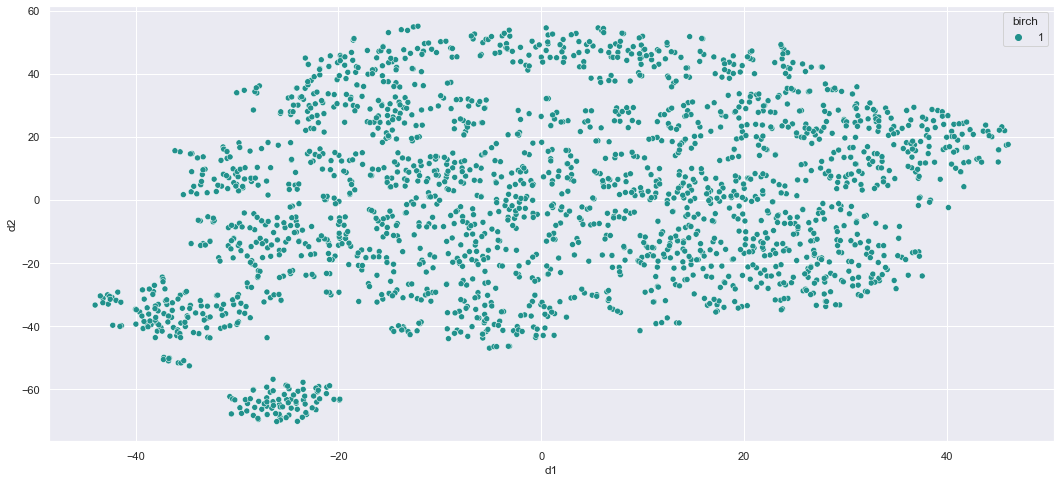

In [23]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='birch', palette='viridis')

Which ever cluster number I am providing this algorithm is making only 1 cluster. Hence this algorithm is not performing well for our dataset.

## DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
model_dbscan = DBSCAN(eps=0.30, min_samples=9)
data['dbscan'] = model_dbscan.fit_predict(x)

<AxesSubplot:xlabel='d1', ylabel='d2'>

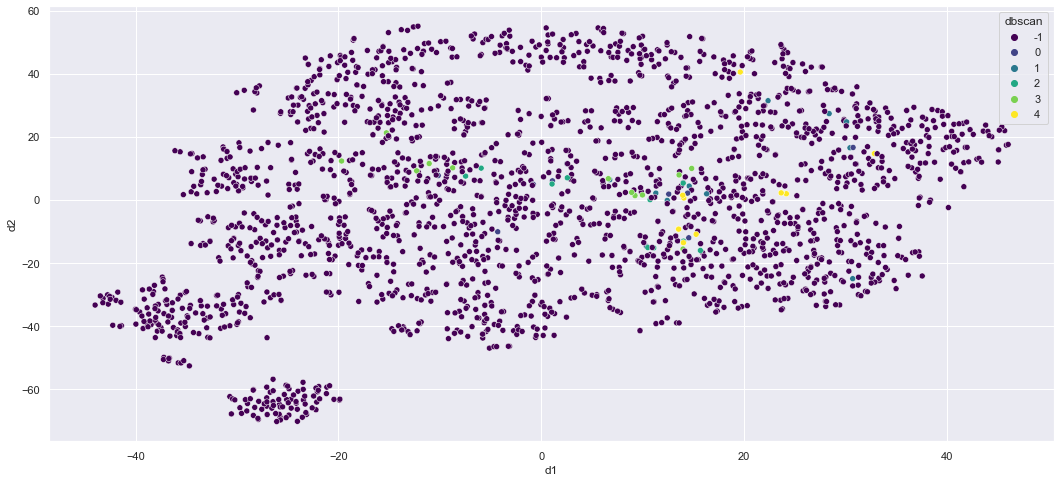

In [26]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='dbscan', palette='viridis')

## Mini-Batch Kmeans

In [27]:
from sklearn.cluster import MiniBatchKMeans

In [28]:
model_minibatch_kmeans = MiniBatchKMeans(n_clusters=6)
model_minibatch_kmeans.fit(x_scaled)
data['minibatch_kmeans'] = model_minibatch_kmeans.predict(x)

<AxesSubplot:xlabel='d1', ylabel='d2'>

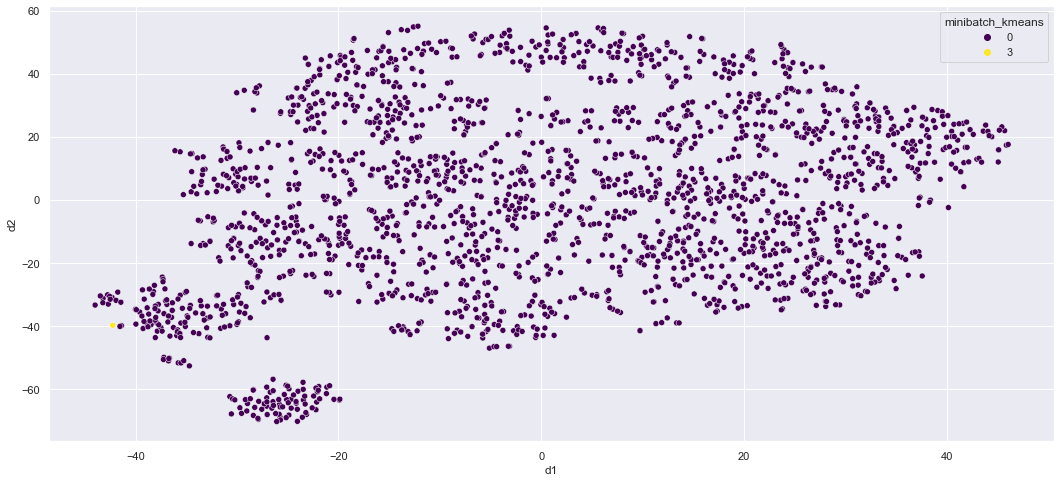

In [29]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='minibatch_kmeans', palette='viridis')

In [30]:
x= x.join(data['agg'])
x.head(3)

danceability  energy  loudness  speechiness  acousticness  \
0         0.836   0.544    -5.975       0.0943        0.0403   
1         0.601   0.724    -4.856       0.0486        0.0945   
2         0.640   0.648    -8.113       0.1870        0.1240   

   instrumentalness  liveness  valence    tempo  agg  
0          0.000000    0.0824    0.510   97.028    0  
1          0.000002    0.1200    0.508  102.061    0  
2          0.000000    0.0802    0.548   92.977    3

In [31]:
average = x.groupby('agg').mean().reset_index()
average

agg  danceability    energy   loudness  speechiness  acousticness  \
0    0      0.674057  0.725457  -5.388399     0.060634      0.144548   
1    1      0.500312  0.309547 -11.057132     0.047426      0.778017   
2    2      0.705783  0.786238  -5.009220     0.085908      0.080379   
3    3      0.701264  0.707223  -6.176345     0.271538      0.165726   
4    4      0.539745  0.716869  -5.408539     0.073685      0.128810   
5    5      0.672253  0.762684  -7.015848     0.067448      0.082396   

   instrumentalness  liveness   valence       tempo  
0          0.003742  0.133256  0.520106  112.267925  
1          0.085131  0.141116  0.299229  113.580909  
2          0.007473  0.361078  0.560929  118.727663  
3          0.004306  0.139713  0.550213  128.162254  
4          0.005020  0.196238  0.453326  151.602377  
5          0.678278  0.185319  0.392234  123.715823

In [32]:
df = df.join(data['agg'])

### Cluster Profile

### Cluster 0

**Features**

danceability | energy
--- | ---
0.59	| 0.72

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.06	| 0.13	| 0.002

loudness | liveness
--- | ---
-5.36 | 0.14

valence	| tempo
--- | ---
0.39 | 124.5

**Description**  
As per the features, cluster 0 contains energetic songs with more of beats (mediocre beats/minute) and less of acouticness and instrumentalness. Moreover, these songs have a little sad and gloomy lyrics. *(Beats + Gloomy)*

Few of the songs in this cluster are as follows:


In [33]:
cluster_0 = df.loc[ df['agg'] == 0, ['artistName', 'trackName']]
cluster_0.sample(5)

artistName                         trackName
1157             Jason Derulo     Lifestyle (feat. Adam Levine)
1375                 Flo Rida                Low (feat. T-Pain)
130              Robin Schulz                             Alane
1411  Macklemore & Ryan Lewis  Can't Hold Us - feat. Ray Dalton
1996                    Token                            Homies

### Cluster 1

**Features**

danceability | energy
--- | ---
0.63	| 0.68

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.05	| 0.18	| 0.65

loudness | liveness
--- | ---
-8.39 | 0.14

valence	| tempo
--- | ---
0.36 | 122.5

**Description**  
As per the features, cluster 1 contains energetic songs with more of beats (mediocre beats/minute) and less of acouticness and speechiness. Moreover, these songs have a little sad and gloomy lyrics. *(Beats + Gloomy)*

However, the only difference with cluster 0 is the instrumentalness. Along with beats and energy the song have lot of instrument sounds.

Few of the songs in this cluster are as follows:


In [34]:
cluster_1 = df.loc[ df['agg'] == 1, ['artistName', 'trackName']]
cluster_1.sample(5)

artistName                                          trackName
2000        Plested                                           25 Hours
764     Jonah Baker                        Hey, Soul Sister - Acoustic
74       Dan + Shay                      Speechless (feat. Tori Kelly)
1864        Hogland                                      Just a Little
314   Lewis Capaldi  when the party's over - Recorded at Spotify St...

### Cluster 2

**Features**


danceability | energy
--- | ---
0.74	| 0.70

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.06	| 0.16	| 0.001

loudness | liveness
--- | ---
-5.46 | 0.12

valence	| tempo
--- | ---
0.68 | 116.09

**Description**  
As per the features, cluster 2 contains energetic songs with more of beats (mediocre beats/minute) and less of acouticness and instrumentalness. Moreover, these songs have a happy lyrics. *(Beats + haapy)*

Few of the songs in this cluster are as follows:


In [35]:
cluster_2 = df.loc[ df['agg'] == 2, ['artistName', 'trackName']]
cluster_2.sample(5)

artistName                     trackName
1847          VINAI        Rise Up (feat. Vamero)
964   Lewis Capaldi    Bruises - Steve Void Remix
960          Tiësto  God Is A Dancer (with Mabel)
761        Borgeous               Someone Save Me
291      Cher Lloyd                   Want U Back

### Cluster 3

**Features**


danceability | energy
--- | ---
0.69	| 0.70

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.26	| 0.19	| 0.003

loudness | liveness
--- | ---
-6.06 | 0.13

valence	| tempo
--- | ---
0.55 | 127.86

**Description**  
As per the features, cluster 3 contains energetic songs with more of beats (mediocre beats/minute) and less of acouticness and instrumentalness. Moreover, these songs have lyrics which are neutral. *(Beats + neutral)*

Few of the songs in this cluster are as follows:


In [36]:
cluster_3 = df.loc[ df['agg'] == 3, ['artistName', 'trackName']]
cluster_3.sample(5)

artistName                                          trackName
1828   DJ Antoine  Ma Chérie - DJ Antoine & Mad Mark 2K12 Radio Edit
503     BLACKPINK                      Ice Cream (with Selena Gomez)
1477          OMI                     Hitchhiker - Deep Chills Remix
1544         Lauv                                   I Like Me Better
1752  Kodak Black                 Roll in Peace (feat. XXXTENTACION)

### Cluster 4

**Features**


danceability | energy
--- | ---
0.67	| 0.75

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.07	| 0.12	| 0.002

loudness | liveness
--- | ---
-5.15 | 0.36

valence	| tempo
--- | ---
0.54 | 115.85

**Description**  
As per the features, cluster 4 contains energetic songs with more of beats (mediocre beats/minute) and less of acouticness and instrumentalness. Moreover, these songs have neutral lyrics. *(Beats + haapy)*

Few of the songs in this cluster are as follows:


In [37]:
cluster_4 = df.loc[ df['agg'] == 4, ['artistName', 'trackName']]
cluster_4.sample(5)

artistName                                          trackName
740   Jake Scott                                          Like This
1501       Solve                                        Going Under
2131         OMI                                        Masterpiece
1037   Cash Cash  How to Love (feat. Sofia Reyes) - Fawks.i_o Remix
2045        Zedd                           Inside Out (feat. Griff)

### Cluster 5

**Features**


danceability | energy
--- | ---
0.54	| 0.36

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.04	| 0.72	| 0.007

loudness | liveness
--- | ---
-9.25 | 0.12

valence	| tempo
--- | ---
0.35 | 107.99

**Description**  
As per the features, cluster 5 contains low energetic songs with less  of beats and more of acouticness and instrumentalness. Moreover, these songs have a sad lyrics. *(Acoustic + sad)*

Few of the songs in this cluster are as follows:


In [38]:
cluster_5 = df.loc[ df['agg'] == 5, ['artistName', 'trackName']]
cluster_5.sample(5)

artistName             trackName
93     Elon “EDM” Musk   Don’t Doubt ur Vibe
381            Blinkie         What You Want
1801     Bingo Players  Chop - Oomloud Refix
383   Paul Kalkbrenner             Parachute
532             Rak-Su        Princess Peach